## **1. Importação de Bibliotecas**

O código utiliza a biblioteca TensorFlow para realizar as operações. A biblioteca Matplotlib é empregada para a visualização dos dados simulados e do modelo ajustado.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


# **2. Geração de Dados Simulados**

Esta função gera dados sintéticos para um polinômio de grau 8, com termos e coeficientes definidos explicitamente. Os pontos x são uniformemente espaçados no intervalo [−10,10], enquanto os valores y correspondem à avaliação do polinômio com ruído adicionado, modelado por uma distribuição normal N(0,1000²).

# **Significado:**
•	A simulação de dados ruidosos reflete cenários reais, como medições experimentais imprecisas.

•	O ruído introduz variabilidade, importante para validar a robustez do modelo.


In [ ]:
# Função para gerar dados simulados para um polinômio de grau 8
def generate_data(n_points=100):
    x = tf.linspace(-10.0, 10.0, n_points)
    # Função polinomial de grau 8
    y = (1e-5 * tf.pow(x, 8) - 3e-4 * tf.pow(x, 7) + 2e-2 * tf.pow(x, 6) - 0.1 * tf.pow(x, 5)
         + 0.5 * tf.pow(x, 4) - 2 * tf.pow(x, 3) + 5 * tf.pow(x, 2) - 10 * x + 20)
    noise = tf.random.normal(shape=y.shape, mean=0.0, stddev=1000.0)
    y = y + noise
    return x, y


# Gerando dados simulados
x, y = generate_data()

# **3. Inicialização de Coeficientes**

Os coeficientes iniciais do polinômio são fornecidos como um vetor constante e convertidos em uma variável treinável no TensorFlow. Essa variável será ajustada durante o processo de otimização.

In [ ]:
# Criando variáveis para os coeficientes do polinômio de grau 8
coeficientes_reais = [ 1.59613790e-04,  6.08977262e-04, -1.49628154e-02, -2.54488936e-01,
                       2.91028907e+00,  5.54905513e+00, -4.61466942e+01, -1.05713846e+02,
                       2.48135832e+02]

coefficients = tf.Variable(coeficientes_reais, dtype=tf.float32)


# **4. Definição do Modelo Polinomial**

Esta função implementa o modelo de regressão polinomial de grau 8. Cada termo do polinômio é calculado utilizando potências de x multiplicadas pelos coeficientes correspondentes. Os termos são somados para gerar a predição YPredito

In [ ]:
# Função para o modelo polinomial de grau 8
def polynomial_model(x):
    poly_terms = [coefficients[i] * tf.pow(x, 8 - i) for i in range(9)]
    return tf.add_n(poly_terms)

# **5. Função de Custo**

A função de custo emprega o erro quadrático médio (MSE), que calcula a média dos quadrados das diferenças entre os valores preditos e os valores simulados. Este é um critério comum para regressão devido à sua sensibilidade a grandes desvios.



In [ ]:
# Função de custo
def loss_fn():
    y_pred = polynomial_model(x)
    return tf.reduce_mean(tf.square(y_pred - y))

# 6. **Otimização**

O otimizador Adam é selecionado para ajustar os coeficientes do polinômio. Ele combina métodos de momento e escalonamento adaptativo da taxa de aprendizado, garantindo convergência eficiente.

In [ ]:
# Otimizador
optimizer = tf.optimizers.Adam(learning_rate=0.01)

# 7. Treinamento do **Modelo**

O modelo é treinado por 1000 épocas, durante as quais o TensorFlow calcula o gradiente do custo em relação aos coeficientes (variáveis treináveis). O otimizador aplica os gradientes para atualizar os coeficientes e minimizar a função de custo.

# **Significado:**

*   A abordagem iterativa permite a adaptação dos coeficientes para melhor ajuste aos dados.
*   O uso de tf.GradientTape facilita o cálculo automático de derivadas.


In [ ]:
# Treinando o modelo
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn()
    gradients = tape.gradient(loss, [coefficients]) # Calculate gradients
    optimizer.apply_gradients(zip(gradients, [coefficients])) # Apply gradients

# 8. **Visualização**

Os dados simulados são exibidos como pontos azuis, enquanto a curva ajustada pelo modelo polinomial é representada por uma linha vermelha. A visualização confirma se o modelo ajusta adequadamente os dados simulados.

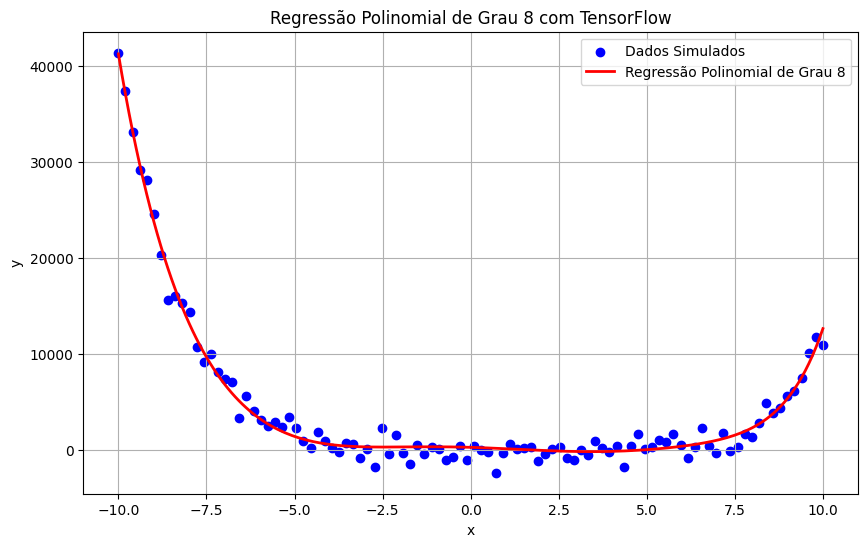

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 4.12645000e+04,  3.70367070e+04,  3.32038516e+04,  2.97300117e+04,
        2.65826543e+04,  2.37322344e+04,  2.11520586e+04,  1.88178848e+04,
        1.67078086e+04,  1.48019365e+04,  1.30822871e+04,  1.15325137e+04,
        1.01378096e+04,  8.88470215e+03,  7.76094678e+03,  6.75537598e+03,
        5.85780078e+03,  5.05889502e+03,  4.35011035e+03,  3.72358740e+03,
        3.17208691e+03,  2.68891968e+03,  2.26789233e+03,  1.90325635e+03,
        1.58966125e+03,  1.32212292e+03,  1.09598535e+03,  9.06895508e+02,
        7.50782166e+02,  6.23834412e+02,  5.22486877e+02,  4.43407227e+02,
        3.83485840e+02,  3.39827759e+02,  3.09746216e+02,  2.90758667e+02,
        2.80581787e+02,  2.77129578e+02,  2.78510315e+02,  2.83024414e+02,
        2.89162140e+02,  2.95601318e+02,  3.01204254e+02,  3.05014465e+02,
        3.06252350e+02,  3.04310455e+02,  2.98747528e+02,  2.89281616e+02,
        2.75782349e+02,  2.58262024e+02,  2.36865326

In [19]:
# Valores de x e y para o gráfico do polinômio ajustado
x_range = tf.linspace(-10.0, 10.0, 200)
x_range = tf.reshape(x_range, (-1, 1))
y_pred = polynomial_model(x_range)

# Plotando os dados simulados e o polinômio ajustado
plt.figure(figsize=(10, 6))
plt.scatter(tf.reshape(x, -1), tf.reshape(y, -1), color='blue', label='Dados Simulados')
plt.plot(tf.reshape(x_range, -1), tf.reshape(y_pred, -1), color='red', linewidth=2, label='Regressão Polinomial de Grau 8')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Polinomial de Grau 8 com TensorFlow")
plt.legend()
plt.grid(True)
plt.show()